### Importing Libraries

In [1]:
# Importing necessary libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

### Loading Datasets and Merging

In [3]:
import pandas as pd

# Load the email dataset (list of email exchanges)
emails = pd.read_csv('email-Eu-core.txt', sep=r'\s+', names=['sender', 'receiver'])

# Load the department dataset (list of employees & their departments)
departments = pd.read_csv('email-Eu-core-department-labels.txt', sep=r'\s+', names=['node', 'department'])

# Merge sender department
emails = emails.merge(departments, left_on='sender', right_on='node', how='left').rename(columns={'department': 'sender_department'})

# Merge receiver department
emails = emails.merge(departments, left_on='receiver', right_on='node', how='left').rename(columns={'department': 'receiver_department'})

# Drop redundant columns
emails.drop(columns=['node_x', 'node_y'], inplace=True)

# Save the merged dataset as a new file
emails.to_csv("merged_email_data.csv", index=False)

# Display confirmation message
print("Merged dataset saved as 'merged_email_data.csv'. Ready for analysis!")


Merged dataset saved as 'merged_email_data.csv'. Ready for analysis!


### Basic Statistics

In [4]:
import networkx as nx

# Load the merged dataset
df = pd.read_csv("merged_email_data.csv")

# Create the graph from sender-receiver relationships
G = nx.from_pandas_edgelist(df, 'sender', 'receiver', create_using=nx.Graph())

# Compute basic statistics
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / total_nodes
density = nx.density(G)

# Display results in a table
basic_stats = pd.DataFrame({
    "Metric": ["Total Nodes", "Total Edges", "Average Degree", "Density"],
    "Value": [total_nodes, total_edges, average_degree, density]
})

print(basic_stats)

           Metric         Value
0     Total Nodes   1005.000000
1     Total Edges  16706.000000
2  Average Degree     33.245771
3         Density      0.033113


### Network Diagram

In [5]:
import networkx as nx
from pyvis.network import Network
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd

# Load the merged dataset
df = pd.read_csv("merged_email_data.csv")

# Step 1: Create the graph from sender-receiver relationships
graph = nx.from_pandas_edgelist(df, 'sender', 'receiver', create_using=nx.Graph())

# Extract the largest connected component
if not nx.is_connected(graph):
    largest_component = max(nx.connected_components(graph), key=len)
    graph = graph.subgraph(largest_component).copy()

# Step 2: Compute centrality measures
betweenness = nx.betweenness_centrality(graph)
eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)
degree = dict(graph.degree())  # Get degree centrality

# Step 3: Filter Top 50 Most Important Nodes (Based on Betweenness & Eigenvector Centrality)
important_nodes = sorted(betweenness, key=betweenness.get, reverse=True)[:50]
subgraph = graph.subgraph(important_nodes).copy()

# Normalize betweenness for color mapping
norm = mcolors.Normalize(vmin=min(betweenness.values()), vmax=max(betweenness.values()))
cmap = cm.get_cmap("coolwarm")  # Choose a color map

# Step 4: Create an Interactive PyVis Network
net = Network(notebook=False, width="100%", height="800px", bgcolor="#222222", font_color="white")

# Add Nodes with Hover Info (Including Degree)
for node in subgraph.nodes():
    net.add_node(
        str(node),  # Ensure node IDs are strings
        label=str(node), 
        title=f"Betweenness: {betweenness[node]:.5f}<br>Eigenvector: {eigenvector[node]:.5f}<br>Degree: {degree[node]}",
        size=10 + betweenness[node] * 1000  # Scale node size by importance
    )

# Add Edges
for edge in subgraph.edges():
    net.add_edge(str(edge[0]), str(edge[1]), color='gray')

# Step 5: Improve Layout & Display
net.force_atlas_2based()  # Uses a physics-based layout
net.show_buttons(filter_=['physics'])  # Allow user to adjust physics settings
net.write_html("Email Network Diagram.html")  # Saves as an HTML file

print("Interactive Email Network Diagram saved as 'Email Network Diagram.html'. Open it in a browser.")

Interactive Email Network Diagram saved as 'Email Network Diagram.html'. Open it in a browser.


C:\Users\Chidubem\AppData\Local\Temp\ipykernel_7484\1448875201.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")  # Choose a color map


### Further Stats

In [11]:
import networkx as nx
import pandas as pd

# Assuming 'graph' is already defined as your network graph

# 1. Betweenness Centrality
betweenness = nx.betweenness_centrality(graph)

# 2. Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)

# 3. Average Clustering Coefficient
avg_clustering = nx.average_clustering(graph)

# 4. Triangles Count
triangles = nx.triangles(graph)
total_triangles = sum(triangles.values()) // 3  # Dividing by 3 to get the unique triangles

# 5. Number of Connected Components and Largest Component Size
connected_components = list(nx.connected_components(graph))
num_components = len(connected_components)
largest_component_size = len(max(connected_components, key=len))

# 6. Giant Component Analysis
giant_component = max(connected_components, key=len)
giant_component_nodes = len(giant_component)
giant_component_ratio = giant_component_nodes / total_nodes

# 7. Diameter
if nx.is_connected(graph):
    diameter = nx.diameter(graph)
else:
    diameter = None  # If the graph is disconnected, diameter doesn't exist

# 8. Average Shortest Path Length
if nx.is_connected(graph):
    avg_shortest_path = nx.average_shortest_path_length(graph)
else:
    avg_shortest_path = None  # If the graph is disconnected, the average shortest path doesn't exist

# Create a DataFrame to display all results
results = pd.DataFrame({
    "Metric": [
        "Betweenness Centrality",
        "Eigenvector Centrality",
        "Average Clustering Coefficient",
        "Total Triangles",
        "Number of Connected Components",
        "Largest Component Size",
        "Giant Component Size",
        "Giant Component Ratio",
        "Diameter",
        "Average Shortest Path Length"
    ],
    "Value": [
        sum(betweenness.values()),  # You can display the sum or a sample/average, depending on your needs
        sum(eigenvector.values()),  # Same as above, consider the sum or an average
        avg_clustering,
        total_triangles,
        num_components,
        largest_component_size,
        giant_component_nodes,
        giant_component_ratio,
        diameter,
        avg_shortest_path
    ]
})

# Display the table
print(results)

                           Metric          Value
0          Betweenness Centrality       1.590159
1          Eigenvector Centrality      19.813639
2  Average Clustering Coefficient       0.407050
3                 Total Triangles  105461.000000
4  Number of Connected Components       1.000000
5          Largest Component Size     986.000000
6            Giant Component Size     986.000000
7           Giant Component Ratio       0.981095
8                        Diameter       7.000000
9    Average Shortest Path Length       2.586934


### Visuals for Further Stats

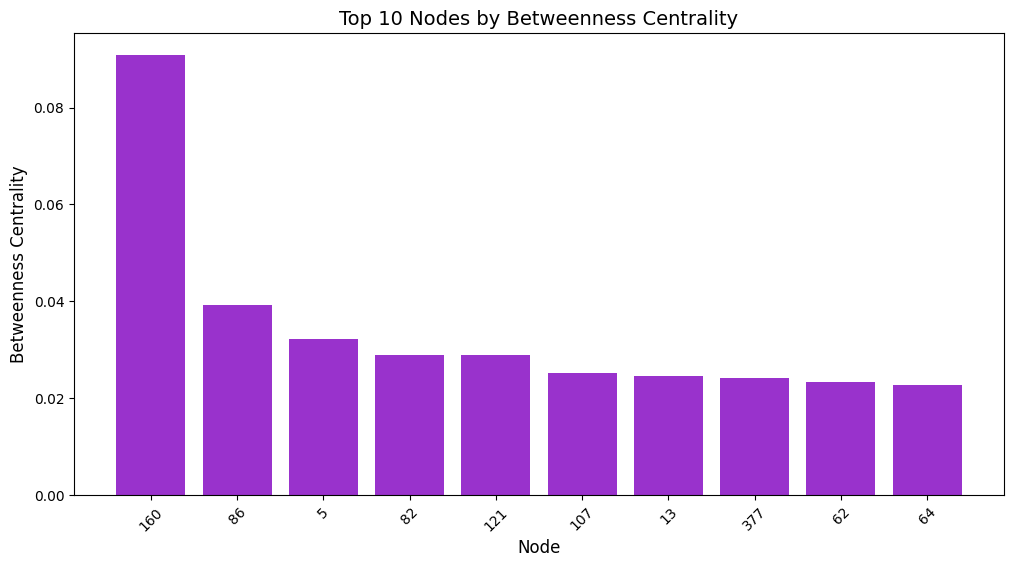

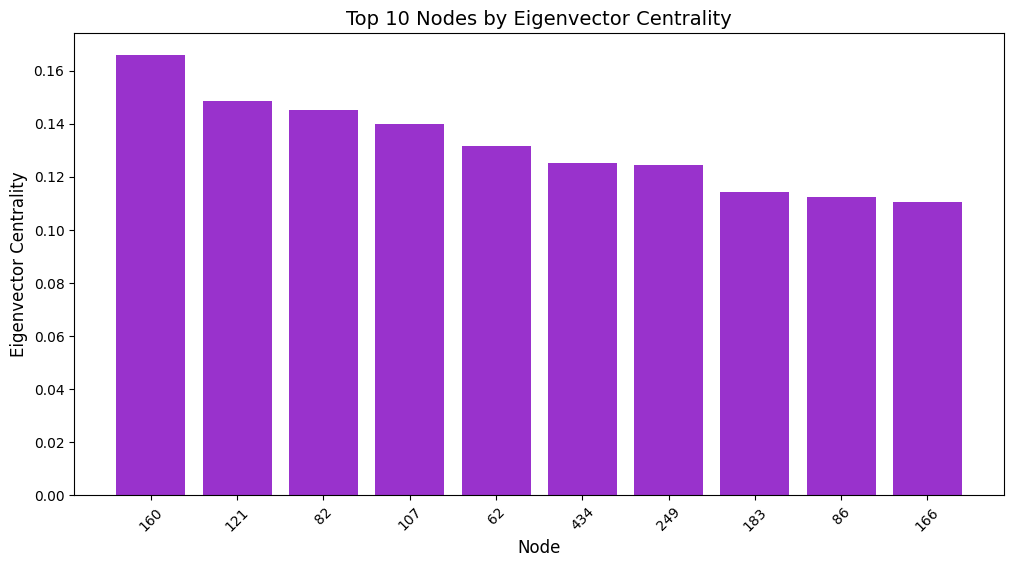

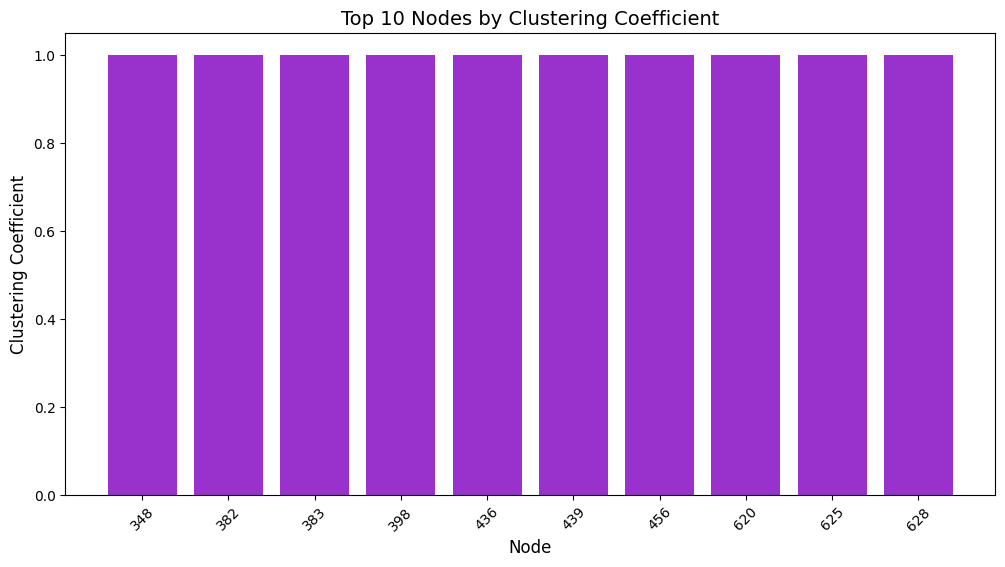

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Assuming 'graph' is already defined as your network graph

# 1. Compute Betweenness Centrality (Top 10)
betweenness = nx.betweenness_centrality(graph)
top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
betweenness_df = pd.DataFrame(top_10_betweenness, columns=['Node', 'Betweenness Centrality'])

# 2. Compute Eigenvector Centrality (Top 10)
eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)
top_10_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:10]
eigenvector_df = pd.DataFrame(top_10_eigenvector, columns=['Node', 'Eigenvector Centrality'])

# 3. Compute Clustering Coefficient (Top 10)
clustering_coeffs = nx.clustering(graph)
top_10_clustering = sorted(clustering_coeffs.items(), key=lambda x: x[1], reverse=True)[:10]
clustering_df = pd.DataFrame(top_10_clustering, columns=['Node', 'Clustering Coefficient'])

# 4. Plotting the Bar Charts

# Betweenness Centrality
plt.figure(figsize=(12, 6))
plt.bar(betweenness_df['Node'].astype(str), betweenness_df['Betweenness Centrality'], color='darkorchid')
plt.xlabel("Node", fontsize=12)
plt.ylabel("Betweenness Centrality", fontsize=12)
plt.title("Top 10 Nodes by Betweenness Centrality", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Eigenvector Centrality
plt.figure(figsize=(12, 6))
plt.bar(eigenvector_df['Node'].astype(str), eigenvector_df['Eigenvector Centrality'], color='darkorchid')
plt.xlabel("Node", fontsize=12)
plt.ylabel("Eigenvector Centrality", fontsize=12)
plt.title("Top 10 Nodes by Eigenvector Centrality", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Clustering Coefficient
plt.figure(figsize=(12, 6))
plt.bar(clustering_df['Node'].astype(str), clustering_df['Clustering Coefficient'], color='darkorchid')
plt.xlabel("Node", fontsize=12)
plt.ylabel("Clustering Coefficient", fontsize=12)
plt.title("Top 10 Nodes by Clustering Coefficient", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Clustering Coefficient Distribution

Top 10 Nodes with Highest Clustering Coefficients:
     Node  Clustering Coefficient
456   456                     1.0
903   903                     1.0
911   911                     1.0
436   436                     1.0
630   630                     1.0
382   382                     1.0
383   383                     1.0
398   398                     1.0
439   439                     1.0
646   646                     1.0


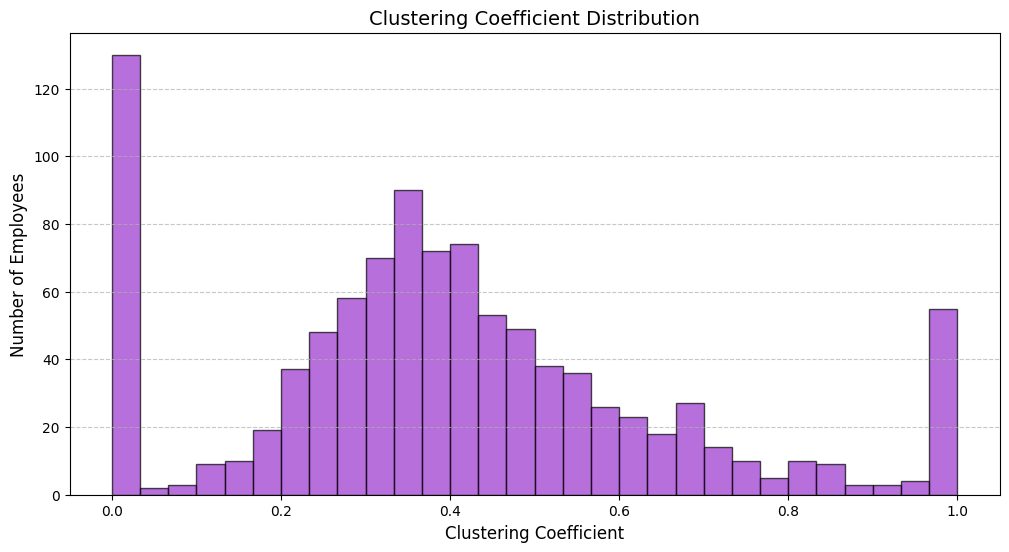

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Compute clustering coefficients
clustering_coeffs = nx.clustering(graph)

# Convert the clustering coefficients into a DataFrame
clustering_df = pd.DataFrame(clustering_coeffs.items(), columns=['Node', 'Clustering Coefficient'])

# Sort the DataFrame by clustering coefficient in descending order
clustering_df = clustering_df.sort_values(by='Clustering Coefficient', ascending=False)

# Display the top 10 nodes with the highest clustering coefficients
top_10_clustering = clustering_df.head(10)
print("Top 10 Nodes with Highest Clustering Coefficients:")
print(top_10_clustering)

# Create histogram for clustering coefficient distribution
plt.figure(figsize=(12, 6))
plt.hist(clustering_coeffs.values(), bins=30, color='darkorchid', edgecolor='black', alpha=0.7)

plt.xlabel("Clustering Coefficient", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.title("Clustering Coefficient Distribution", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Department-Level Communication Density

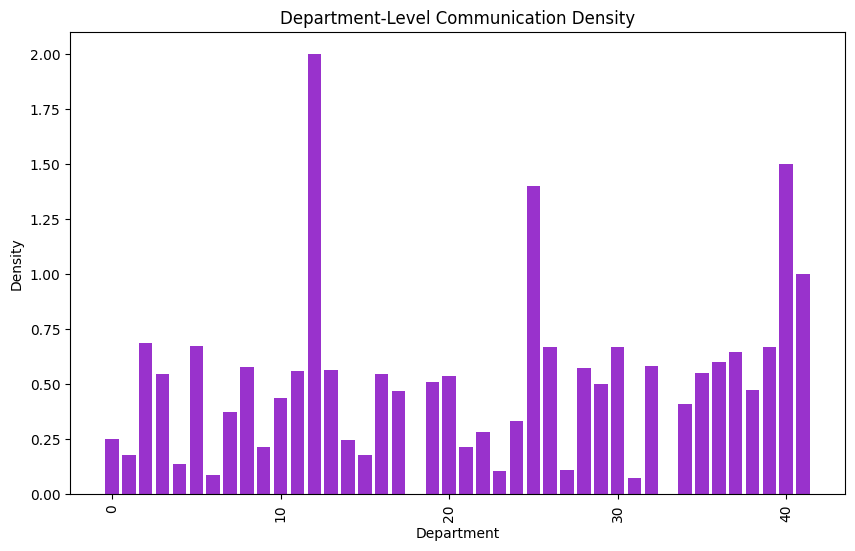

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Group by departments and calculate communication density
# Assuming 'df' contains the dataset with 'sender', 'receiver', 'sender_department', 'receiver_department'
graph = nx.from_pandas_edgelist(df, 'sender', 'receiver', create_using=nx.Graph())

# Grouping edges by departments
department_edges = df.groupby(['sender_department', 'receiver_department']).size().reset_index(name="edges")
department_nodes = df[['sender_department', 'receiver_department']].stack().unique()

# Compute density for each department
density = {}
for department in department_nodes:
    subgraph_nodes = df[df['sender_department'] == department]['sender'].unique().tolist() + \
                     df[df['receiver_department'] == department]['receiver'].unique().tolist()
    subgraph = graph.subgraph(subgraph_nodes)
    density[department] = nx.density(subgraph)

# Visualising Density
plt.figure(figsize=(10, 6))
plt.bar(density.keys(), density.values(), color='darkorchid')
plt.xlabel('Department')
plt.ylabel('Density')
plt.title('Department-Level Communication Density')
plt.xticks(rotation=90)
plt.show()


### Interdepartmental Communication Flow

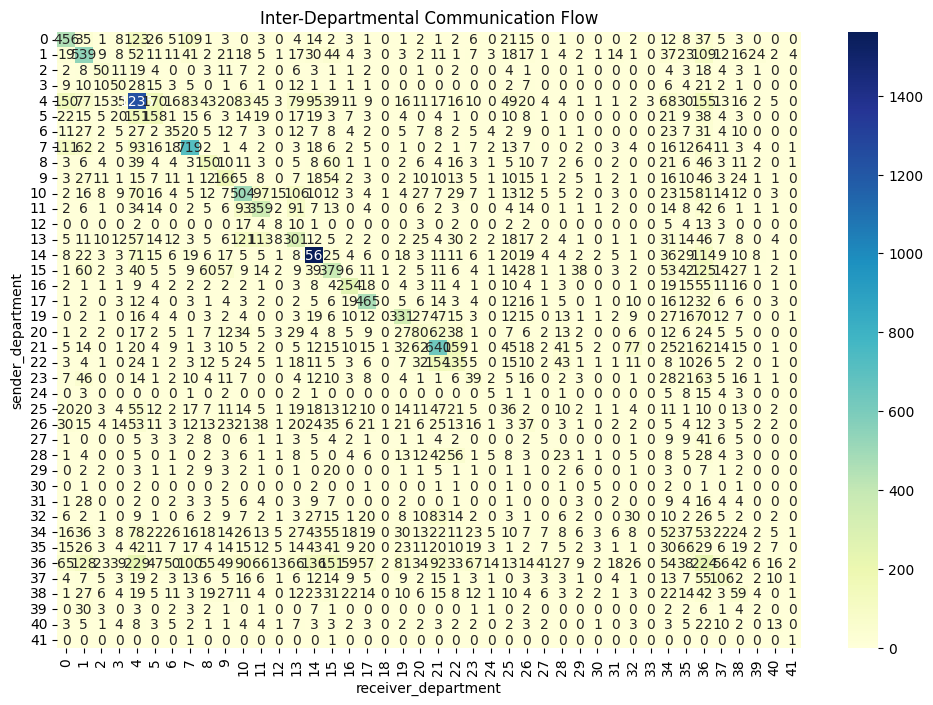

In [19]:
# Count the number of edges between departments
department_comm_flow = df.groupby(['sender_department', 'receiver_department']).size().unstack(fill_value=0)

# Visualising as a Heatmap
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(department_comm_flow, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Inter-Departmental Communication Flow')
plt.show()


### Clustering Coefficient by Department

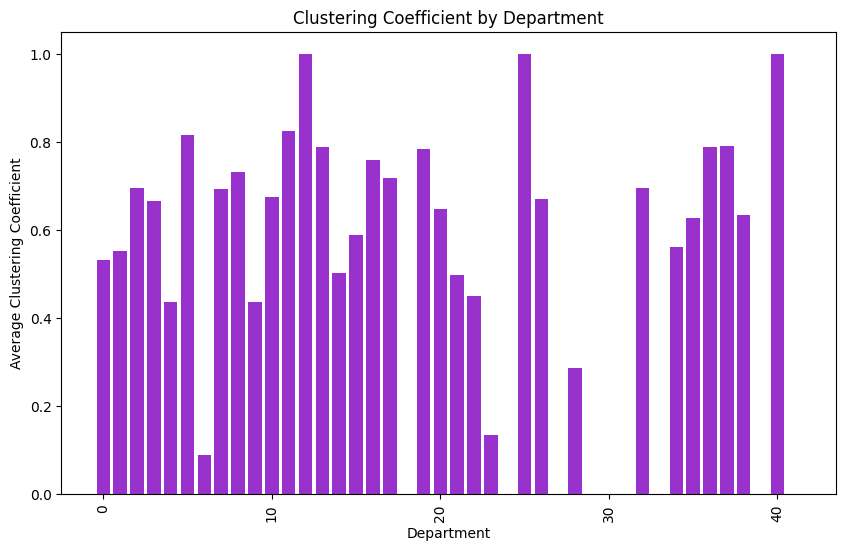

In [35]:
# Calculate clustering coefficient by department
clustering_by_department = {}
for department in department_nodes:
    subgraph_nodes = df[df['sender_department'] == department]['sender'].unique().tolist() + \
                     df[df['receiver_department'] == department]['receiver'].unique().tolist()
    subgraph = graph.subgraph(subgraph_nodes)
    clustering_by_department[department] = nx.average_clustering(subgraph)

# Visualising Clustering Coefficients
plt.figure(figsize=(10, 6))
plt.bar(clustering_by_department.keys(), clustering_by_department.values(), color='darkorchid')
plt.xlabel('Department')
plt.ylabel('Average Clustering Coefficient')
plt.title('Clustering Coefficient by Department')
plt.xticks(rotation=90)
plt.show()

### Email Volume by Department

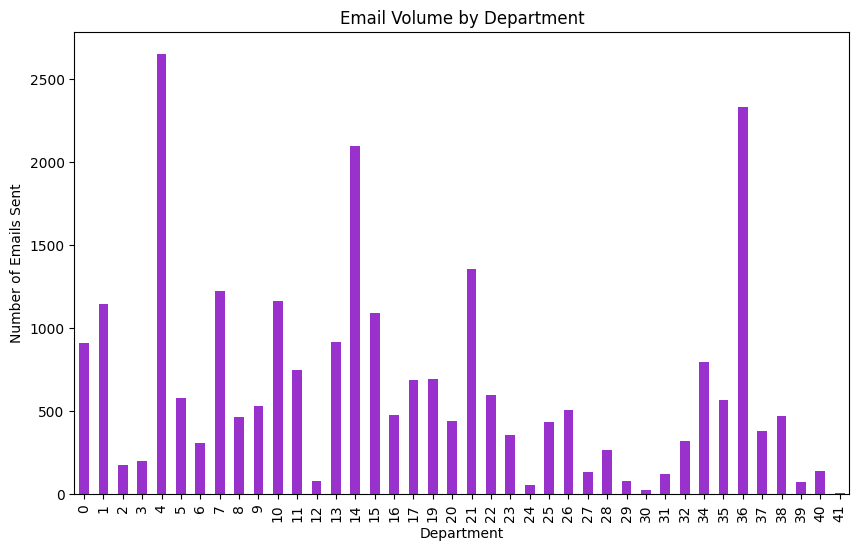

In [34]:
# Count the number of emails sent by each department
email_volume = df.groupby('sender_department').size()

# Visualising Email Volume
plt.figure(figsize=(10, 6))
email_volume.plot(kind='bar', color='darkorchid')
plt.xlabel('Department')
plt.ylabel('Number of Emails Sent')
plt.title('Email Volume by Department')
plt.xticks(rotation=90)
plt.show()

### Power Distribution Across Departments

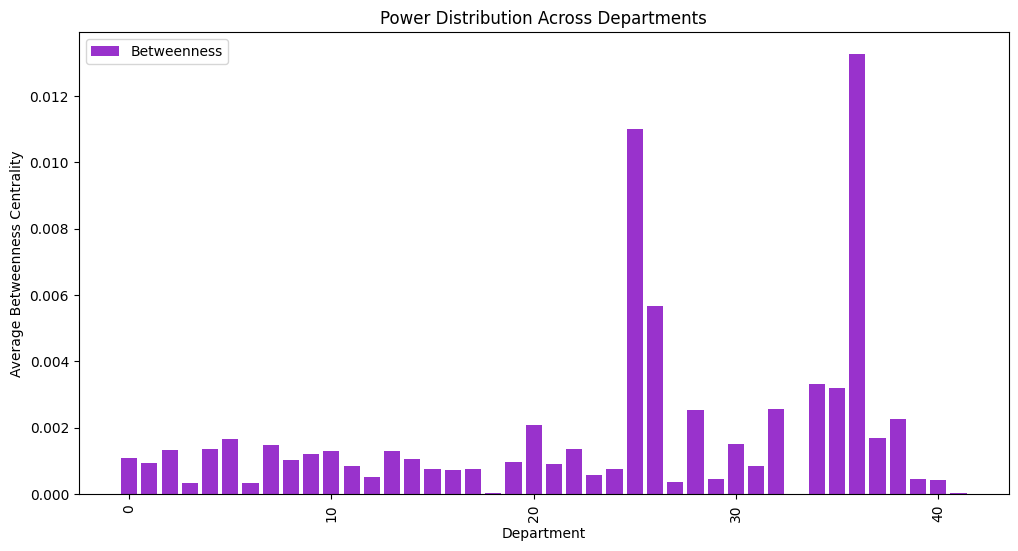

In [33]:
# Check the eigenvector centrality and betweenness centrality distribution across departments
power_by_department = {}
for department in department_nodes:
    subgraph_nodes = df[df['sender_department'] == department]['sender'].unique().tolist() + \
                     df[df['receiver_department'] == department]['receiver'].unique().tolist()
    subgraph = graph.subgraph(subgraph_nodes)
    
    # Calculate average eigenvector and betweenness centrality
    subgraph_betweenness = [betweenness[node] for node in subgraph.nodes()]
    subgraph_eigenvector = [eigenvector[node] for node in subgraph.nodes()]
    
    power_by_department[department] = {
        'average_betweenness': sum(subgraph_betweenness) / len(subgraph_betweenness),
        'average_eigenvector': sum(subgraph_eigenvector) / len(subgraph_eigenvector)
    }

# Visualising Power Distribution
plt.figure(figsize=(12, 6))
departments, betweenness_scores = zip(*[(dept, values['average_betweenness']) for dept, values in power_by_department.items()])
plt.bar(departments, betweenness_scores, color='darkorchid', label="Betweenness")

plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Average Betweenness Centrality')
plt.title('Power Distribution Across Departments')
plt.legend()
plt.show()


### Departmental Influence

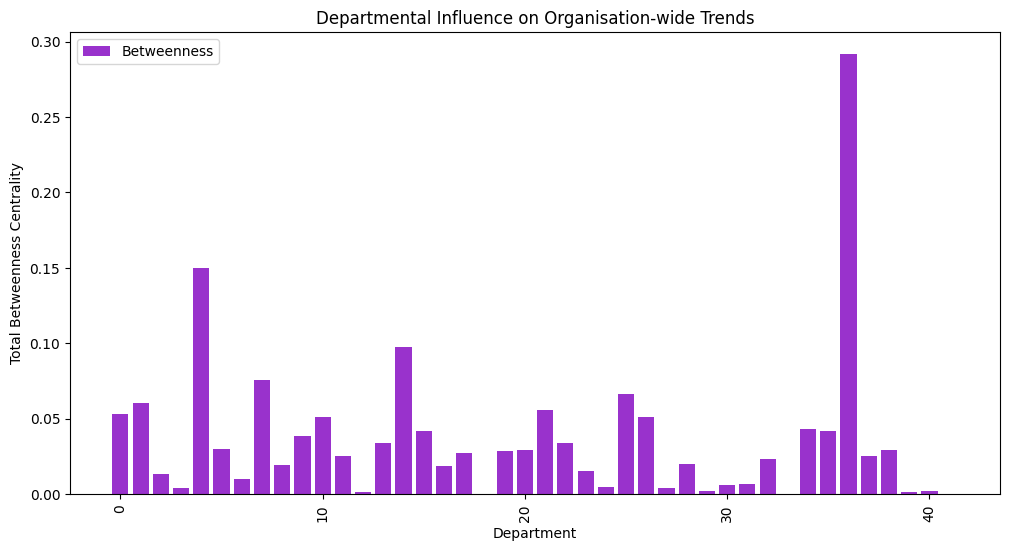

In [32]:
# Assuming 'sender_department' is the department that initiates communication
# Calculate who is sending the most influential emails (by centrality measures)
influence_by_department = {}
for department in department_nodes:
    subgraph_nodes = df[df['sender_department'] == department]['sender'].unique().tolist() + \
                     df[df['receiver_department'] == department]['receiver'].unique().tolist()
    subgraph = graph.subgraph(subgraph_nodes)
    
    # Calculate total centrality measures for the department
    total_betweenness = sum([betweenness[node] for node in subgraph.nodes()])
    total_eigenvector = sum([eigenvector[node] for node in subgraph.nodes()])
    
    influence_by_department[department] = {
        'total_betweenness': total_betweenness,
        'total_eigenvector': total_eigenvector
    }

# Visualising Influence
plt.figure(figsize=(12, 6))
departments, betweenness_values = zip(*[(dept, values['total_betweenness']) for dept, values in influence_by_department.items()])
plt.bar(departments, betweenness_values, color='darkorchid', label="Betweenness")
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Total Betweenness Centrality')
plt.title('Departmental Influence on Organisation-wide Trends')
plt.legend()
plt.show()